# 4.10 Coding Etiquette & Excel Reporting

## Objective of script

### 1. Consolidate results of Python analysis in a final report for stakeholders
### 2. Prepare a population flow to demonstrate process of data cleaning

# 01. Importing Libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Dataframes

In [2]:
# Import dataframes, creating shortcut to data file and verify

path = r'/Users/tatumzeliadt/Library/CloudStorage/OneDrive-Personal/Data Analytics/Data Immersion/4 Achievement 4 Python Fundamentals for Data Analysts/Instacart Basket Analysis'
print(path) 

/Users/tatumzeliadt/Library/CloudStorage/OneDrive-Personal/Data Analytics/Data Immersion/4 Achievement 4 Python Fundamentals for Data Analysts/Instacart Basket Analysis


In [3]:
# Import merged dataframe part 1 of objectives; ords_prods_cstmrs.pkl

df_ords_prods_cstmrs = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_cstmrs.pkl'))

# 03. Dimension Checks

In [4]:
# Verify dimensions

df_ords_prods_cstmrs.shape

(32404859, 33)

In [5]:
# Verify general dataframe information

df_ords_prods_cstmrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

# 04. Data Security 

In [7]:
# Check first five rows of new ords_prods_merged_update dataframe

df_ords_prods_cstmrs.head()d

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,age,state,registration_date,number_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,31,Alabama,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,31,Alabama,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,31,Alabama,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,31,Alabama,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,31,Alabama,2/17/2019,3,married,40423


In [8]:
# Dropping PII data first_name and last_name column 

df_orders_products_customers = df_ords_prods_cstmrs.drop(columns = ['first_name', 'last_name'])

In [9]:
# Data security PII check of first five rows

df_orders_products_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_prior_order,order_frequency_flag,gender,age,state,registration_date,number_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423


In [10]:
# Data security PII double check of columns

df_orders_products_customers.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_order',
       'order_frequency_flag', 'gender', 'age', 'state', 'registration_date',
       'number_dependants', 'marital_status', 'income'],
      dtype='object')

# 05. Comparison of customer spending habits per geographical region

## Group states based of US Census Bureau-designated areas

In [11]:
# Check state column

df_orders_products_customers['state'].value_counts().sort_index()

Alabama                 638003
Alaska                  648495
Arizona                 653964
Arkansas                636144
California              659783
Colorado                639280
Connecticut             623022
Delaware                637024
District of Columbia    613695
Florida                 629027
Georgia                 656389
Hawaii                  632901
Idaho                   607119
Illinois                633024
Indiana                 627282
Iowa                    625493
Kansas                  637538
Kentucky                632490
Louisiana               637482
Maine                   638583
Maryland                626579
Massachusetts           646358
Michigan                630928
Minnesota               647825
Mississippi             632675
Missouri                640732
Montana                 635265
Nebraska                625813
Nevada                  636139
New Hampshire           615378
New Jersey              627692
New Mexico              654494
New York

In [12]:
# Define regional divisions

region_1_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [13]:
region_2_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [14]:
region_3_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [15]:
region_4_W = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [19]:
# Create new column region based off of defined regional divisions (12-15)

df_orders_products_customers.loc[df_orders_products_customers['state'].isin(region_1_NE), 'region'] = 'Northeast'

df_orders_products_customers.loc[df_orders_products_customers['state'].isin(region_2_MW), 'region'] = 'Midwest'

df_orders_products_customers.loc[df_orders_products_customers['state'].isin(region_3_S), 'region'] = 'South'

df_orders_products_customers.loc[df_orders_products_customers['state'].isin(region_4_W), 'region'] = 'West'

In [20]:
# Check frequency of regional divisions

df_orders_products_customers['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [21]:
# Check the length to verify all rows have been updated

len(df_orders_products_customers['region'])

32404859

In [22]:
df_orders_products_customers.shape

(32404859, 32)

## Determine if there’s a difference in spending habits between the different U.S. regions

In [23]:
# Crosstab spending habits; crossing the variables region with the spending flag

crosstab_spending_habits = pd.crosstab(df_orders_products_customers['region'], df_orders_products_customers['spending_flag'], dropna = False)

In [24]:
crosstab_spending_habits

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [25]:
# Crosstab spending habits; crossing the variables region with the spending flag

crosstab_spending_habits1 = pd.crosstab(df_orders_products_customers['spending_flag'], df_orders_products_customers['region'], dropna = False)
crosstab_spending_habits1

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,155975,108225,209691,160354
Low spender,7441350,5614511,10582194,8132559


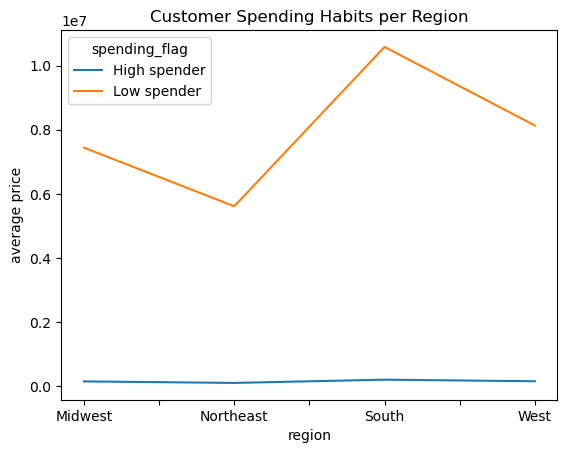

In [27]:
# Create Line Chart of comparison of customer spending habits per geographical region

line_chart_spending_habits1 = sns.lineplot(crosstab_spending_habits1.T.plot.line()
plt.title('Customer Spending Habits per Region')
plt.xlabel('region')
plt.ylabel('average price')
plt.show()

In [28]:
# Check frequency; value counts of spending_flag column

df_orders_products_customers['spending_flag'].value_counts(dropna = False)

Low spender     31770614
High spender      634245
Name: spending_flag, dtype: int64

# 06. Create an exclusion flag for low-activity customers 

In [29]:
# Creating activity flag of low-activity customer

df_orders_products_customers.loc[df_orders_products_customers['max_order'] <5, 'activity_flag'] = 'Low activity'

In [32]:
# Creating activity flag of high-activity customer

df_orders_products_customers.loc[df_orders_products_customers['max_order'] >=5, 'activity_flag'] = 'High activity'

In [33]:
# Verify new activity_flag column by viewing first five rows

df_orders_products_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,age,state,registration_date,number_dependants,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity


In [34]:
# Check frequency of activity of customers 

df_orders_products_customers['activity_flag'].value_counts(dropna = False)

High activity    30964564
Low activity      1440295
Name: activity_flag, dtype: int64

In [35]:
# Check the length to verify all rows have been updated

len(df_orders_products_customers['activity_flag'])

32404859

In [36]:
# Create a subset of High activity - to exclude Low activity customers

high_activity_customers = df_orders_products_customers[df_orders_products_customers['activity_flag'] == 'High activity']

In [39]:
high_activity_customers.shape

(30964564, 33)

In [41]:
high_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,age,state,registration_date,number_dependants,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity


In [37]:
# Create a subset of Low activity - to exclude High activity customers

low_activity_customers = df_orders_products_customers[df_orders_products_customers['activity_flag'] == 'Low activity']

In [40]:
low_activity_customers.shape

(1440295, 33)

In [42]:
low_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,age,state,registration_date,number_dependants,marital_status,income,region,activity_flag
1510,520620,120,1,3,11,NaN,196,2,0,Soda,...,Regular customer,Female,54,Kentucky,3/2/2017,2,married,99219,South,Low activity
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Regular customer,Female,54,Kentucky,3/2/2017,2,married,99219,South,Low activity
1512,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,Regular customer,Female,54,Kentucky,3/2/2017,2,married,99219,South,Low activity
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Regular customer,Female,54,Kentucky,3/2/2017,2,married,99219,South,Low activity
1514,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,...,Regular customer,Female,54,Kentucky,3/2/2017,2,married,99219,South,Low activity


# 07. Exporting Dataframe

In [43]:
# Exporting dataframe high_activity_customers as pickle file

high_activity_customers.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [44]:
# Exporting dataframe low_activity_customers as pickle file

low_activity_customers.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'low_activity_customers.pkl'))

# 08. Exporting the visualizations as “.png” files

In [46]:
# Line Chart of comparison of customer spending habits per geographical region

line_chart_spending_habits1.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'line_chart_spending_habits1.png'))